In [1]:
import os
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")
dir_ = "C:\\Users\\mqayum2\\Box\\Spring 2024\\Data Science\\Data Science Final Project"
os.chdir(dir_)

os.getcwd()
%run 23_Sentiment_Analysis.ipynb

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mqayum2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mqayum2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
X = StandardScaler().fit_transform(drug_5.iloc[:, :-1])

y = StandardScaler().fit_transform(drug_5[['sentiment']])

model = Lasso(alpha=.1)
model = model.fit(X=X,y=y)


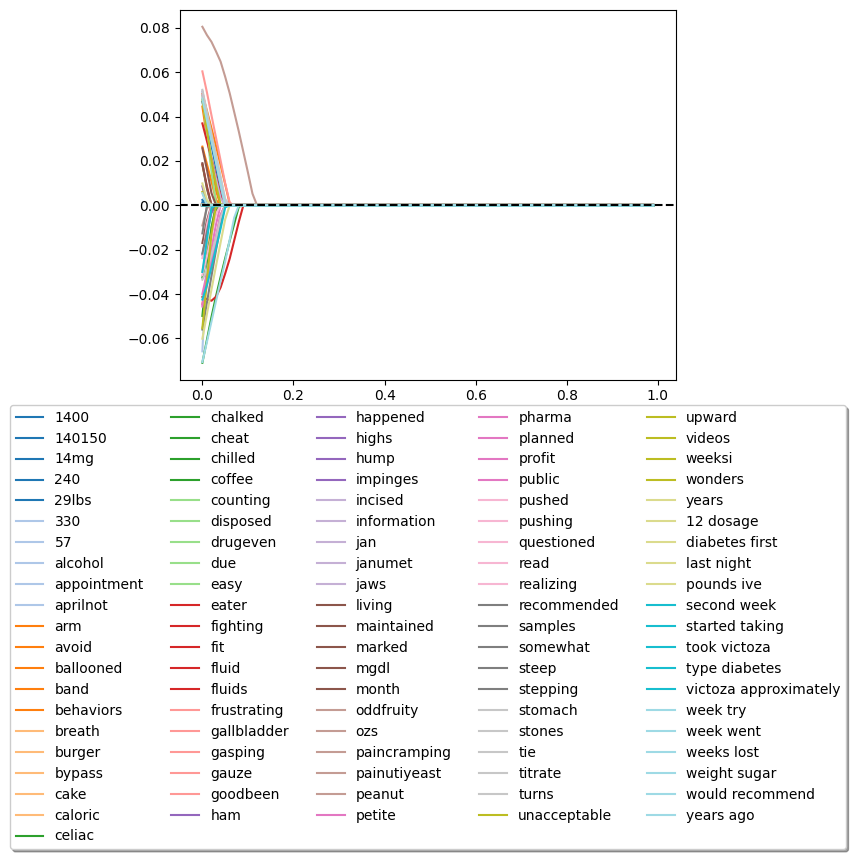

In [3]:
initial_words = list(drug_5[words].loc[:,model.coef_!=0].columns)
# Get a list of all of the coefficients which are themselves a list for every value of the grid
Alpha = np.arange(0,1,.01)
out = [list(get_coefs(a,initial_words,['sentiment'])) for a in Alpha]

OUT = pd.DataFrame(out).iloc[:, :len(initial_words)]
OUT.columns = initial_words
OUT.index = Alpha

                            #  word labels         alpha vals
# Plot it over alpha
OUT.plot(cmap="tab20") # this colormap is easier to see
plt.axhline(0,color='black',ls="--") # origin line
#plt.axvline(lasso_model.alpha_,color='black',ls="--") # a vertical line for the optimal value of alpha
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5) # Putting the legend below the graph

In [4]:
Alpha = np.arange(0,.05,.01)
# Fitting the LassoCV model with 10-fold cross validation
lasso_model = LassoCV(alphas=Alpha,cv=10)

# Fit the data
lasso_model = lasso_model.fit(X=X,y=y)

In [5]:
lasso_model.alpha_

0.03

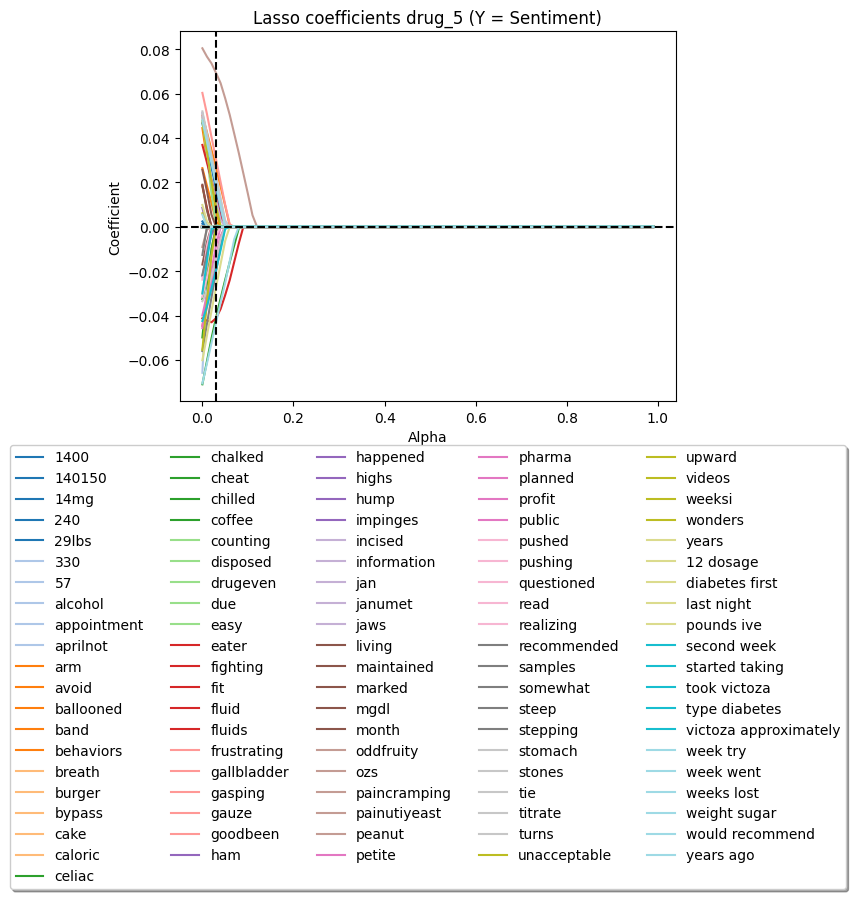

In [6]:
## Plotting again but after adding a vertical line for the optimal alpha value

# Plot it over alpha
OUT.plot(cmap="tab20") # this colormap is easier to see
plt.title("Lasso coefficients drug_5 (Y = Sentiment)")
plt.xlabel("Alpha")
plt.ylabel("Coefficient")
plt.axhline(0,color='black',ls="--") # origin line
plt.axvline(lasso_model.alpha_,color='black',ls="--") # a vertical line for the optimal value of alpha
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=5) # Putting the legend below the graph

 We want to visualize the positive words that are most predictive of high sentiment score
 We will show them in a word cloud. Even though a word cloud is usually created to present the frequencies of words, we will use it
 here to show the most predictive positive words. The way we will do it is that we will create an artifical "frequency" of the words
 such that the most positive words will have a higher frequency. Basically, this frequency will be based on the ranking of the word.

 We arbitrarily chose a cutoff for the positive words above to include a limited number of words (29 in this case). Now we will create a ranking
 column based on the coefficient value of the words

In [38]:
final_words_drug_5 = list(data[words].loc[:,lasso_model.coef_!=0].columns)
final_coefs = pd.DataFrame([words,lasso_model.coef_]).T

final_coefs = final_coefs.set_index(0)

final_coefs = final_coefs[final_coefs[1]!=0]

import numpy as np
final_coefs["abs_"] = np.abs(final_coefs[1])
final_coefs.sort_values(by='abs_', ascending=False)


positive_words=final_coefs[final_coefs[1]>.04].sort_values(by=1, ascending=False).reset_index()

## We will repeat the process for negative words. We will choose the cutoff arbitrarily

negative_words=final_coefs[final_coefs[1]<-.03].sort_values(by=1, ascending=True).reset_index()

negative_words['ranking'] = negative_words['abs_'].rank(method='dense', ascending=True)
negative_words.dropna(inplace=True)
## Creating a dictionary of words and their "frequencies"/rankings

neg_dic = negative_words.set_index(0).to_dict()['ranking']



positive_words['ranking'] = positive_words['abs_'].rank(method='dense', ascending=True)
positive_words['ranking'] = positive_words['ranking'].astype(int)

positive_words.dropna(inplace=True)

## Creating a dictionary of words and their "frequencies"/rankings
pos_dic = positive_words.set_index(0).to_dict()['ranking']



## Most Postive Words

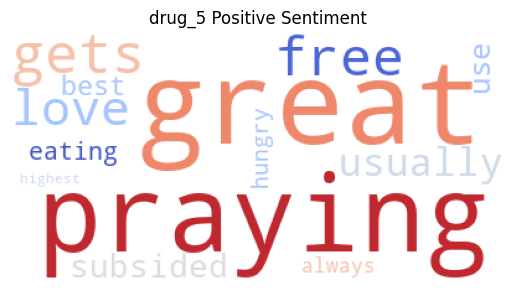

In [39]:
## Creating the word cloud
wordcloud = WordCloud(background_color='white', colormap='coolwarm')
wordcloud.generate_from_frequencies(pos_dic)
plt.imshow(wordcloud)
plt.title('drug_5 Positive Sentiment')
plt.axis("off")
plt.show()

## Most Negative Words

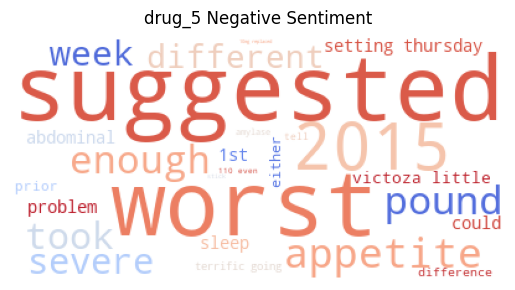

In [40]:

## Creating the word cloud
wordcloud = WordCloud(background_color='white', colormap='coolwarm')
wordcloud.generate_from_frequencies(neg_dic)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('drug_5 Negative Sentiment')
plt.show()